# Table of Contents
 <p><div class="lev1"><a href="#Single-loop"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single loop</a></div><div class="lev1"><a href="#Many-LEFs"><span class="toc-item-num">2&nbsp;&nbsp;</span>Many LEFs</a></div><div class="lev1"><a href="#Statistics-of-loop-arrays."><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics of loop arrays.</a></div><div class="lev1"><a href="#Visualize-loops"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize loops</a></div>

In [ ]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

# Single loop

In [ ]:
p = {}
p['L'] = 100
p['N'] = 1
p['R_OFF'] = 1.0 / 100
p['R_EXTEND'] = float(1.0)
p['R_SHRINK'] = 0#float(.4)
p['R_SWITCH'] =  0.03

p['T_MAX_LIFETIMES'] = 3.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 300
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)
print(ts)


In [ ]:
n=0
plt.plot(
    l_sites[:,n], c='b')
plt.plot(
    r_sites[:,n], c='g')

plt.xlim(0,100)

# Many LEFs

In [ ]:
p = {}
p['L'] = 20000
p['N'] = 300
p['R_OFF'] = 1.0 / 1000.0
p['R_EXTEND'] = float(2.0)
p['R_SHRINK'] = float(0.1)

p['R_SWITCH'] = p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 200
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


In [ ]:
plt.figure(figsize=(15,5))
n=0
plt.step(
    ts,
    l_sites[:,n], c='g',where='post',)
plt.step(
    ts,
    r_sites[:,n], c='g',where='post',)


n=1
plt.step(
    ts,
    l_sites[:,n], c='b',
    where='post',)
plt.step(
    ts,
    r_sites[:,n], c='b',
    where='post',)

# Statistics of loop arrays.

In [ ]:
import collections


In [ ]:
t=-1
parents = looptools.get_parent_loops(
            l_sites[t], 
            r_sites[t])
root_loops_idxs = np.where(parents == -1)[0]
children = looptools.get_loop_branches(parents)

In [ ]:
plt.hist(
    r_sites[t][root_loops_idxs] - l_sites[t][root_loops_idxs],
    bins=20)

# Visualize loops

In [ ]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=2.0)
    plt.xlim(0,p['L']//10)
    plt.xticks([])
    plt.xlabel('chromosomal position')

In [ ]:
loopviz.prepare_canvas(p['L'])

loopviz.plot_lefs(
    l_sites=l_sites[-1,:], 
    r_sites=r_sites[-1,:], 
    colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
    max_height=200,
    plot_text=False,
    height_factor=0.5)
plt.xlim(10000,15000)
plt.xlabel('chromosomal position')

# Testing simlef.pyx

In [1]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

In [19]:
p = {}
p['L'] = 200                  # 20000
p['N'] = 40
p['R_OFF'] = 1.0 / 100.0       # 1.0 / 1000.0
p['R_EXTEND'] = float(0.005)      # 2.0
p['R_SHRINK'] = float(0.0001)      # 0.1

p['R_SWITCH'] = p['R_OFF'] * 10     # p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 600.0        # 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 600              # 200
p['PROCESS_NAME'] = b'proc'         # b'proc'

l_sites, r_sites, ts = simlef.simulate(p, verbose = True)
#l_sites, r_sites, ts = simlef.simulate(p)
#print(ts)



b'proc' 10 1011.4989488513938 60000.0
b'proc' 20 2023.2002249330508 60000.0
b'proc' 30 3035.0859571908386 60000.0
b'proc' 40 4056.311118817221 60000.0
b'proc' 50 5065.435224505444 60000.0
b'proc' 60 6076.271121198688 60000.0
b'proc' 70 7088.474983257353 60000.0
b'proc' 80 8100.422386109668 60000.0
b'proc' 90 9108.147440957217 60000.0
b'proc' 100 10128.219860461637 60000.0
b'proc' 110 11150.493933905362 60000.0
b'proc' 120 12159.350879790427 60000.0
b'proc' 130 13170.798348038968 60000.0
b'proc' 140 14186.833770321267 60000.0
b'proc' 150 15201.061352818626 60000.0
b'proc' 160 16214.952541409104 60000.0
b'proc' 170 17222.323108129516 60000.0
b'proc' 180 18235.997586905756 60000.0
b'proc' 190 19248.028296948618 60000.0
b'proc' 200 20258.48130318535 60000.0
b'proc' 210 21273.281952210327 60000.0
b'proc' 220 22289.789279122997 60000.0
b'proc' 230 23308.37336220152 60000.0
b'proc' 240 24323.353633233575 60000.0
b'proc' 250 25346.776852473376 60000.0
b'proc' 260 26363.3905785028 60000.0
b'pro

Number of -1 entries in l_sites: 323


(0.0, 400.0)

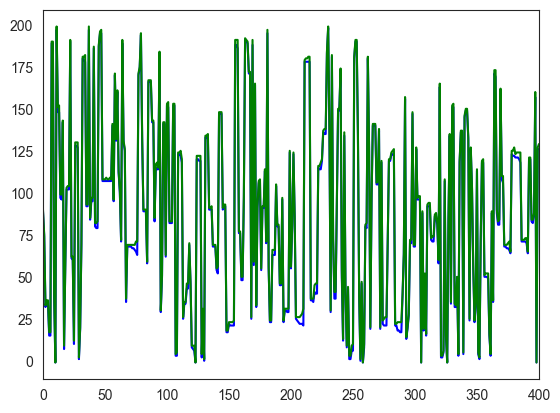

In [20]:
n=0
plt.plot(
    l_sites[:,n], c='b')
plt.plot(
    r_sites[:,n], c='g')
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of -1 entries in l_sites: {num_minus_ones}")

plt.xlim(0,400)

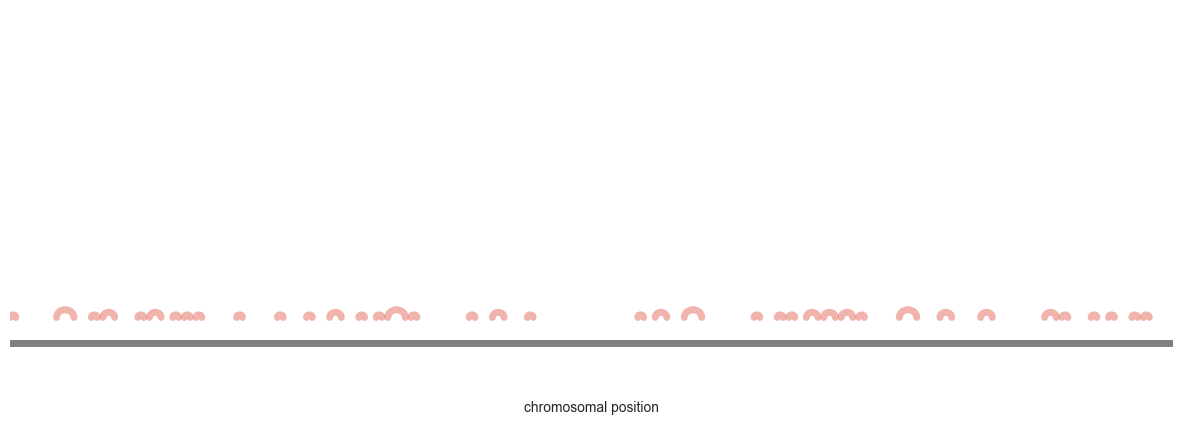

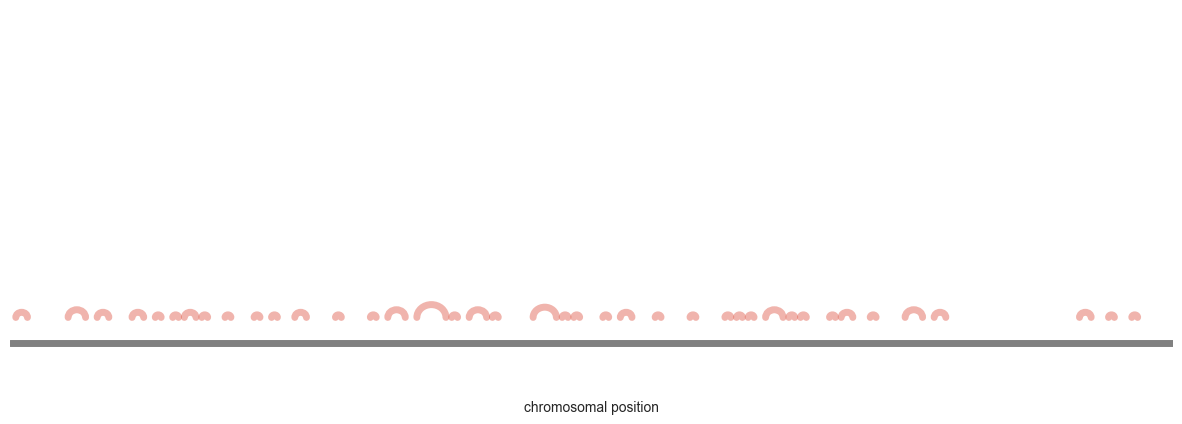

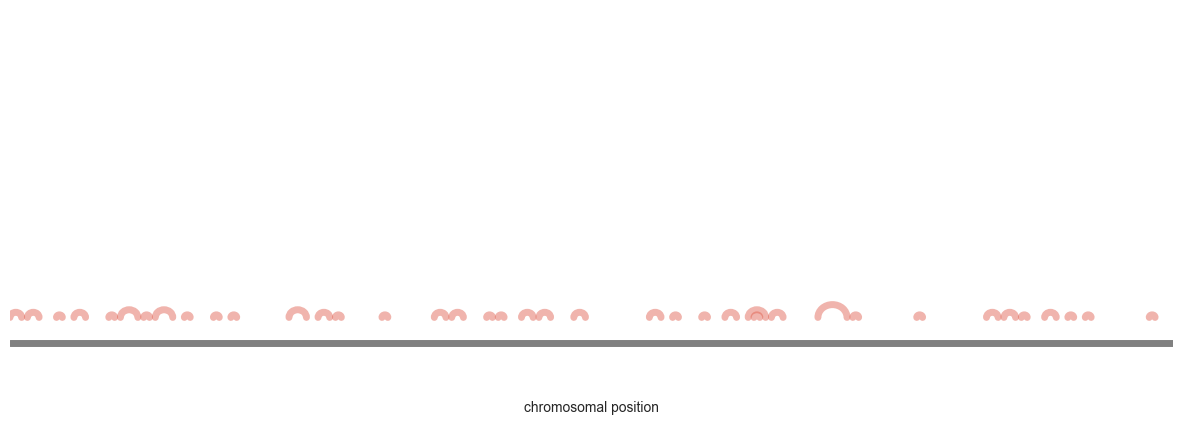

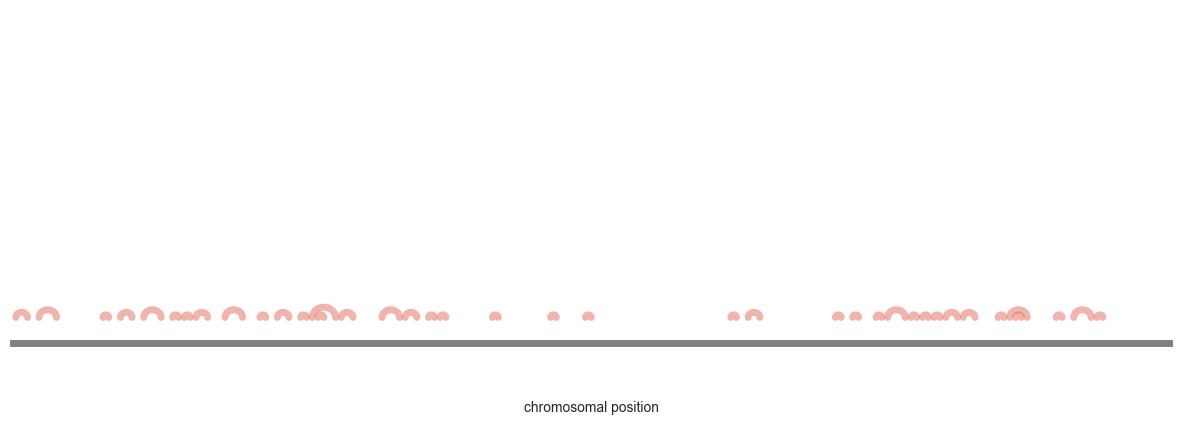

In [21]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=4)  # Controlls loop hight, hight is min(max_height, (r-l)/2.0*height_factor)
    plt.xlim(0,p['L'])
    plt.xticks([])
    plt.xlabel('chromosomal position')

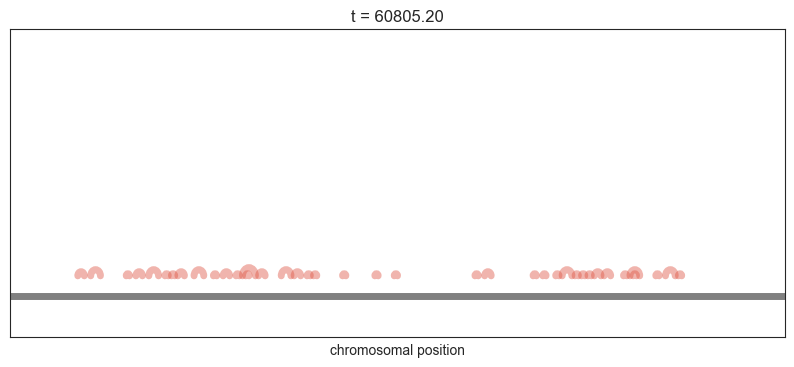

In [22]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 4))

def update(frame):
    ax.clear()
    ax.set_xlim(-20, p['L'] + 20)
    ax.set_ylim(-30, 120)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axhline(-10, color='gray', lw=5, zorder=-1)
    ax.set_xlabel('chromosomal position')
    ax.set_title(f"t = {ts[frame]:.2f}")
    loopviz.plot_lefs(
        l_sites=l_sites[frame],
        r_sites=r_sites[frame],
        colors=[(223.0/255.0,90/255.0,73/255.0)] * 500,
        ax=ax,  # Pass ax!
        max_height=200,
        plot_text=False,
        height_factor=4
    )

ani = FuncAnimation(fig, update, frames=len(ts), interval=10)
ani.save("video_trial.mp4", writer="ffmpeg", fps=60)
plt.show()

## Analysis of Produced data

What is the data currently showing us?

### ChIP-Seq

My thoughts on how to compute ChIP-Seq... Well, just make a bin counter that counts how many times any leg goes through each of the L sites on the genome.

In [ ]:
L = p['L']      # Number of sites
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of times -1 appears in l_sites: {num_minus_ones}")

Number of times -1 appears in l_sites: 323
200


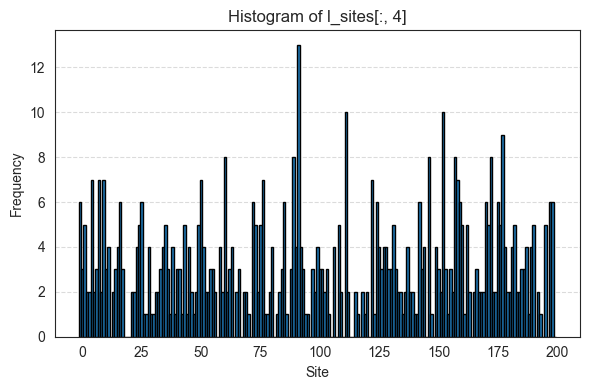

In [24]:
# Example: choose the column index you want to plot
i = 4  # change this to select another column

# Your array: l_sites should be of shape (n_snapshots, N)
# This selects column i
data = l_sites[:, i]

# Define the number of bins: from -1 to L-1 (inclusive), total of L+1 bins
bins = np.arange(-1.5, L + 0.5, 1)  # center bins around each integer

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.hist(data, bins=bins, edgecolor='black', align='mid')
plt.title(f'Histogram of l_sites[:, {i}]')
plt.xlabel('Site')
plt.ylabel('Frequency')
#plt.xticks(np.arange(-1, L))  # ticks at each integer value
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
#plt.yscale('log')
plt.tight_layout()
plt.show()

In [25]:
print(f"First Analysis of data:\n")
print(f"Maximum values of l and r: {np.max(l_sites)} ; {np.max(r_sites)}")
print(f"Minumum values of l and r: {np.min(l_sites)} ; {np.min(r_sites)}")
print(f"Number of times either loop was detached: 0: {np.sum(l_sites[:,3] == -1)} ; 1: {np.sum(r_sites[:,4] == -1)}")


First Analysis of data:

Maximum values of l and r: 198 ; 199
Minumum values of l and r: -1 ; -1
Number of times either loop was detached: 0: 10 ; 1: 6


0.004202390505553913
0.004202390505553913


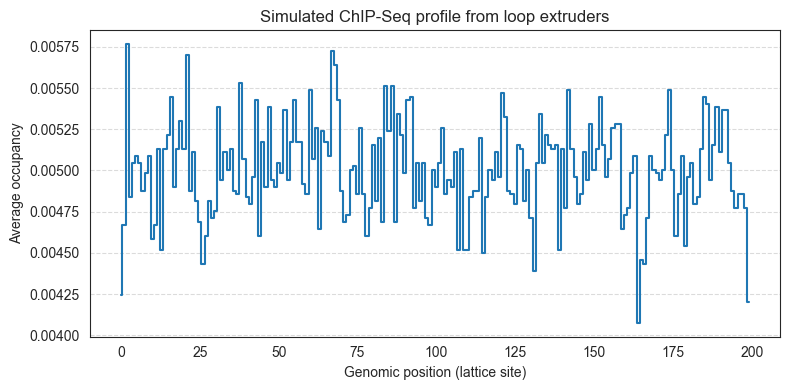

In [26]:
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

all_sites = np.concatenate((l_valid_sites,r_valid_sites))

# Count occurrences at each site from 0 to L-1
# np.bincount will count frequencies of values efficiently
chip_seq_counts = np.bincount(all_sites, minlength=L)

# Optional: normalize to get occupancy per time point
chip_seq_profile = chip_seq_counts / chip_seq_counts.sum()  # or / (T*N) if you want full density

print(chip_seq_profile[199])
print(np.sum(all_sites == 199)/len(all_sites))
# Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(L), chip_seq_profile, drawstyle='steps-mid')
plt.title("Simulated ChIP-Seq profile from loop extruders")
plt.xlabel("Genomic position (lattice site)")
plt.ylabel("Average occupancy")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Loop Size Distribution:

We can compute the loop sizes as the difference between l_site and r_site for each coordinate.

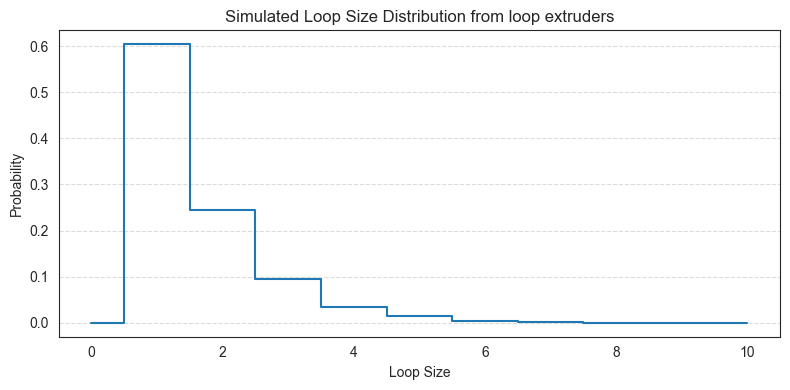

In [27]:
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

loop_sizes = r_valid_sites - l_valid_sites
max_loop_size = np.max(loop_sizes[loop_sizes >= 0])+1  # Get the maximum loop size, ignoring detached loops
loop_dist  = np.bincount(loop_sizes[loop_sizes >= 0], minlength=max_loop_size)
loop_dist_normalized = loop_dist / loop_dist.sum()  # Normalize to get probability distribution


plt.figure(figsize=(8, 4))
plt.plot(np.arange(max_loop_size), loop_dist_normalized, drawstyle='steps-mid')
plt.title("Simulated Loop Size Distribution from loop extruders")
plt.xlabel("Loop Size")
plt.ylabel("Probability")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Loading Site:
This quantity is fed to the system by us. I could try and modify simlef.pyx to include the actual values that are being picked, but they should folow the imposed Distribution (uniform for simplef, other for modified version)

## Path length distribution:

It is imposed, set by `R_OFF` rate. It is the lifetime of the LEFs and should therefore follow an exponential decay. I could modify the code to track this but it might be a bit tricky.

## Full analysis

b'proc' 10 10029.758514904406 600000.0
b'proc' 20 20057.852404386605 600000.0
b'proc' 30 30098.475295125623 600000.0
b'proc' 40 40137.20200088672 600000.0
b'proc' 50 50170.692069991004 600000.0
b'proc' 60 60206.026174587496 600000.0
b'proc' 70 70257.45326546728 600000.0
b'proc' 80 80292.63247417363 600000.0
b'proc' 90 90331.20422880881 600000.0
b'proc' 100 100367.57988992738 600000.0
b'proc' 110 110403.3304625416 600000.0
b'proc' 120 120434.48657449541 600000.0
b'proc' 130 130477.75465099525 600000.0
b'proc' 140 140508.50639663934 600000.0
b'proc' 150 150551.34014547948 600000.0
b'proc' 160 160591.28256990376 600000.0
b'proc' 170 170624.81253729685 600000.0
b'proc' 180 180662.78699294035 600000.0
b'proc' 190 190699.13116002842 600000.0
b'proc' 200 200743.08023906095 600000.0
b'proc' 210 210763.68042980283 600000.0
b'proc' 220 220798.88905668855 600000.0
b'proc' 230 230853.86668566518 600000.0
b'proc' 240 240913.26395830011 600000.0
b'proc' 250 250957.5938968025 600000.0
b'proc' 260 261

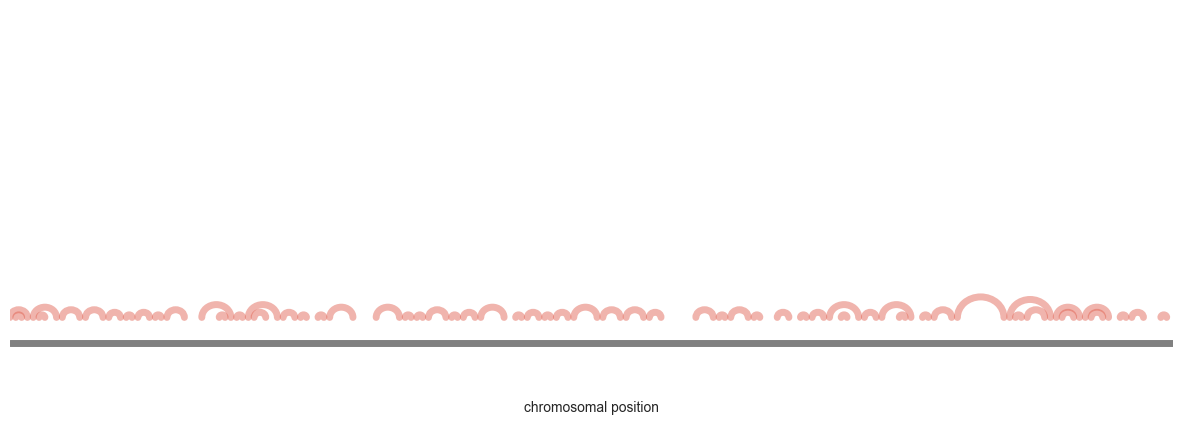

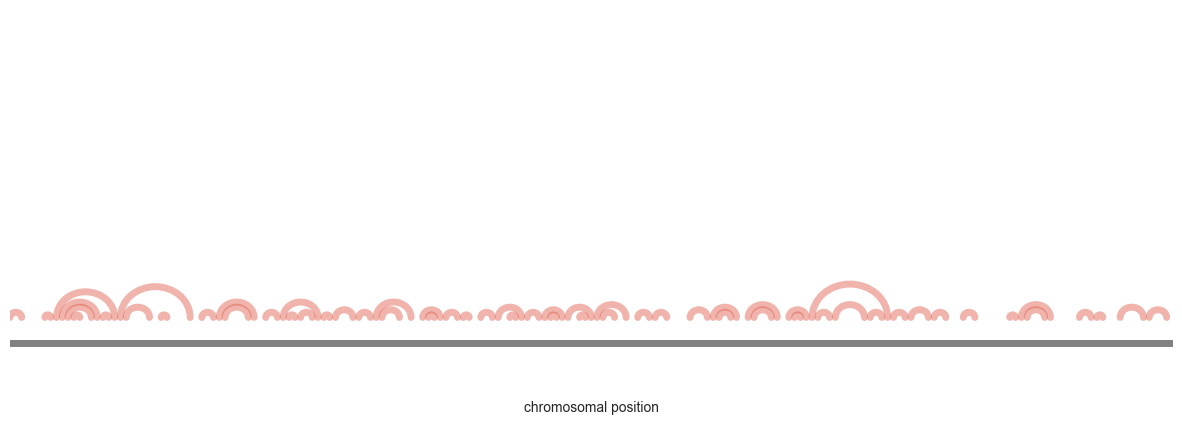

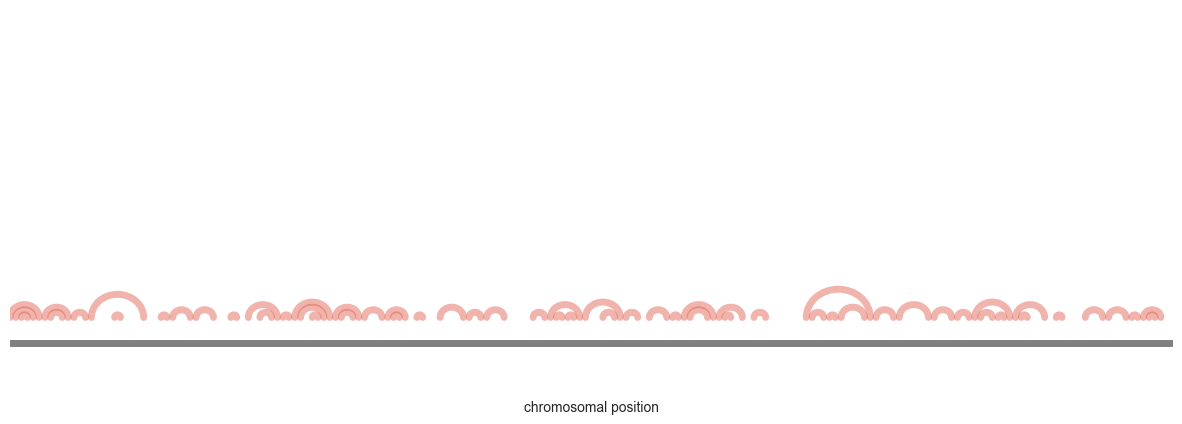

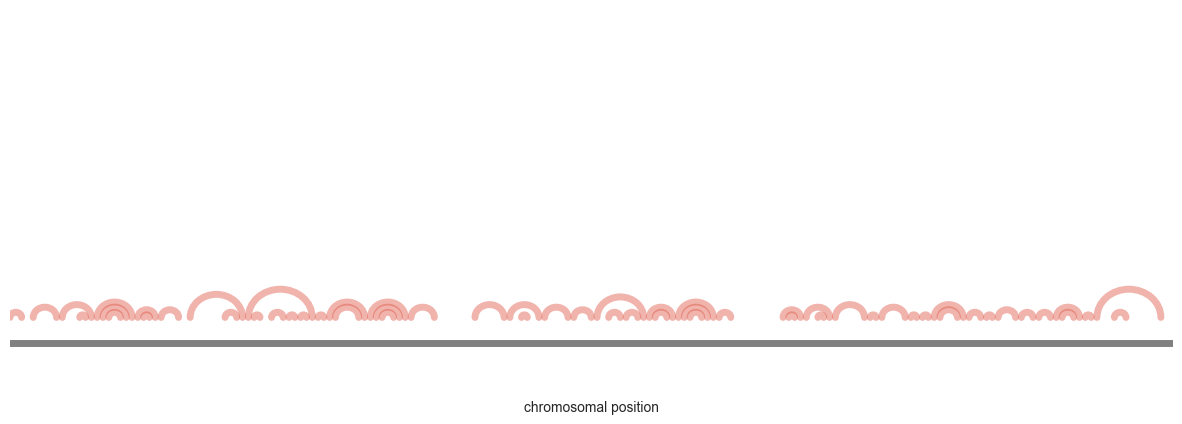

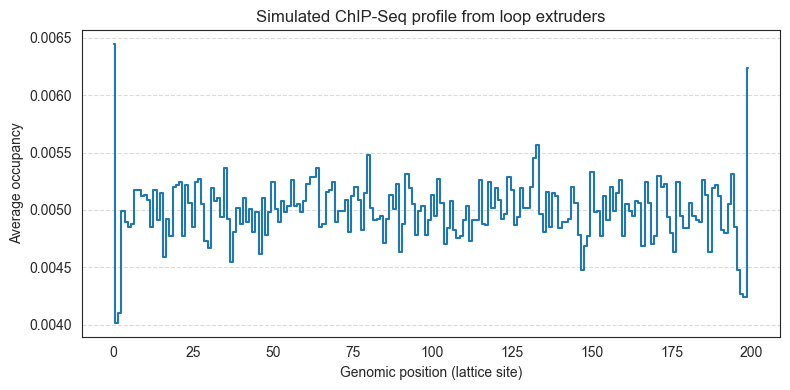

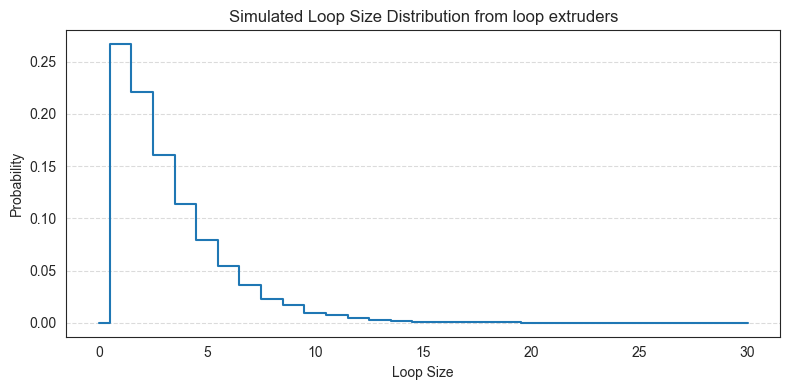

In [ ]:
import sys
import numpy as np
import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload
reload(loopviz)
import seaborn as sns
sns.set_style('white')

p = {}
p['L'] = 200                  # 20000
p['N'] = 60
p['R_OFF'] = 1.0 / 1000.0       # 1.0 / 1000.0
p['R_EXTEND'] = float(0.005)      # 2.0
p['R_SHRINK'] = float(0.0001)      # 0.1

p['R_SWITCH'] = p['R_OFF'] * 10     # p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 600.0        # 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 600              # 200
p['PROCESS_NAME'] = b'proc'         # b'proc'




l_sites, r_sites, ts = simlef.simulate(p, verbose = True)

# 4 Plots of time 0, 5, -20, -1
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=4)  # Controlls loop hight, hight is min(max_height, (r-l)/2.0*height_factor)
    plt.xlim(0,p['L'])
    plt.xticks([])
    plt.xlabel('chromosomal position')


# ChIP-Seq profile
L = p['L']      # Number of sites
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of times -1 appears in l_sites: {num_minus_ones}")
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

all_sites = np.concatenate((l_valid_sites,r_valid_sites))

# Count occurrences at each site from 0 to L-1
# np.bincount will count frequencies of values efficiently
chip_seq_counts = np.bincount(all_sites, minlength=L)

# Optional: normalize to get occupancy per time point
chip_seq_profile = chip_seq_counts / chip_seq_counts.sum()  # or / (T*N) if you want full density

print(chip_seq_profile[199])
print(np.sum(all_sites == 199)/len(all_sites))
# Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(L), chip_seq_profile, drawstyle='steps-mid')
plt.title("Simulated ChIP-Seq profile from loop extruders")
plt.xlabel("Genomic position (lattice site)")
plt.ylabel("Average occupancy")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Loop size distribution
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

loop_sizes = r_valid_sites - l_valid_sites
max_loop_size = np.max(loop_sizes[loop_sizes >= 0])+1  # Get the maximum loop size, ignoring detached loops
loop_dist  = np.bincount(loop_sizes[loop_sizes >= 0], minlength=max_loop_size)
loop_dist_normalized = loop_dist / loop_dist.sum()  # Normalize to get probability distribution


plt.figure(figsize=(8, 4))
plt.plot(np.arange(max_loop_size), loop_dist_normalized, drawstyle='steps-mid')
plt.title("Simulated Loop Size Distribution from loop extruders")
plt.xlabel("Loop Size")
plt.ylabel("Probability")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Create Video
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 4))

def update(frame):
    ax.clear()
    ax.set_xlim(-20, p['L'] + 20)
    ax.set_ylim(-30, 120)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axhline(-10, color='gray', lw=5, zorder=-1)
    ax.set_xlabel('chromosomal position')
    ax.set_title(f"t = {ts[frame]:.2f}")
    loopviz.plot_lefs(
        l_sites=l_sites[frame],
        r_sites=r_sites[frame],
        colors=[(223.0/255.0,90/255.0,73/255.0)] * 500,
        ax=ax,  # Pass ax!
        max_height=200,
        plot_text=False,
        height_factor=4
    )

ani = FuncAnimation(fig, update, frames=len(ts), interval=10)
ani.save("video_trial.mp4", writer="ffmpeg", fps=60)
plt.show()

# Running Janni's Code

## First trials!

I have installed  the `looplib_bacterial` contents (the setup.py) using `pip install -e .` so that the cythonized .pyx code can be executed with python from anywhere on my computer. The `-e` sets it to "eidting mode" = modifications are being uploaded, so that I can test the changes as I go. Lets make a first test to see if I manage to make it run and if it does what it is supposed to be doing. I am thinking of using the video/plotting tools I used in the previous testing section:

b'Test1' burn-in period
b'Test1' burn in complete, starting the simulation
b'Test1' 10 11.765552666690596 800.0
b'Test1' 20 22.979452970888943 800.0
b'Test1' 30 33.96012461683324 800.0
b'Test1' 40 54.903333696716146 800.0
b'Test1' 50 68.29856467977388 800.0
b'Test1' 60 81.48885469233653 800.0
b'Test1' 70 99.68457164268256 800.0
b'Test1' 80 117.28102526882805 800.0
b'Test1' 90 143.86004352241866 800.0
b'Test1' 100 151.13290119149903 800.0
b'Test1' 110 166.1768019275446 800.0
b'Test1' 120 177.531361990961 800.0
b'Test1' 130 199.78034894177262 800.0
b'Test1' 140 223.95336381153754 800.0
b'Test1' 150 244.1612837028278 800.0
b'Test1' 160 263.5794944376733 800.0
b'Test1' 170 284.63098172676484 800.0
b'Test1' 180 306.83634464379367 800.0
b'Test1' 190 318.0118508934783 800.0
b'Test1' 200 332.96181038764524 800.0
b'Test1' 210 347.1712111005742 800.0
b'Test1' 220 361.6754058271245 800.0
b'Test1' 230 375.55171868113683 800.0
b'Test1' 240 398.45095345028676 800.0
b'Test1' 250 412.8449190496036 800

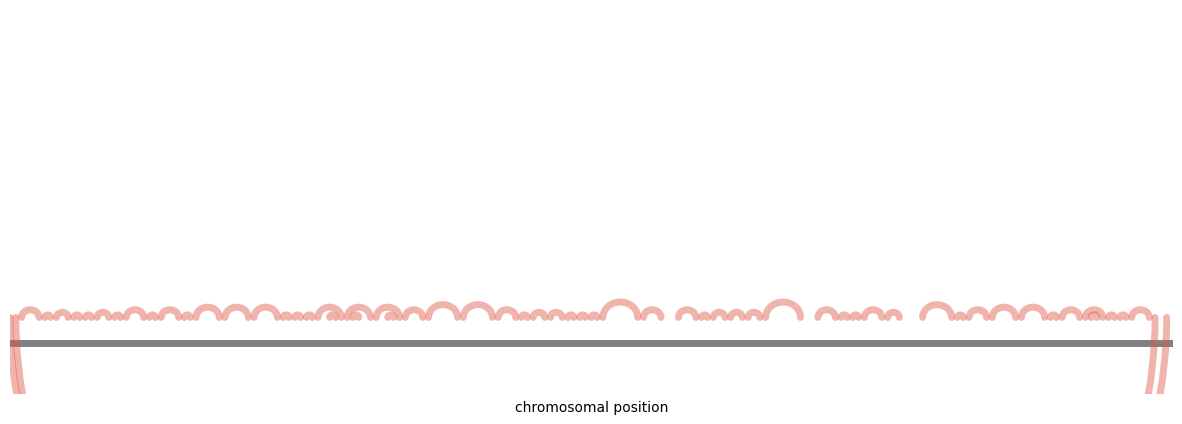

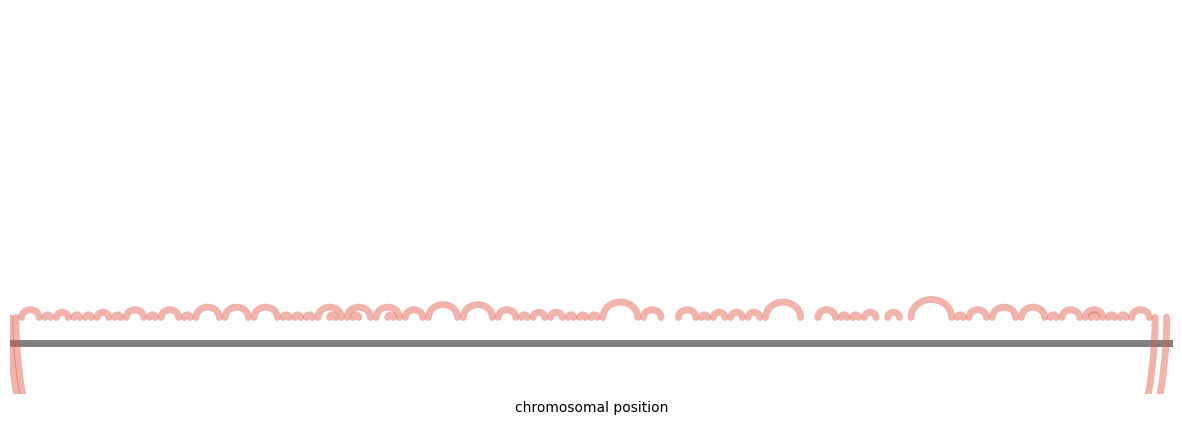

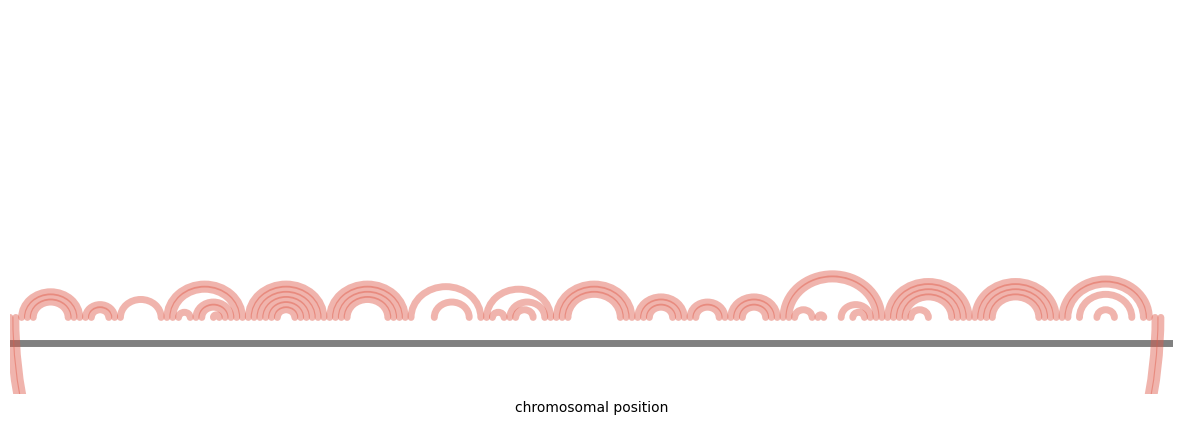

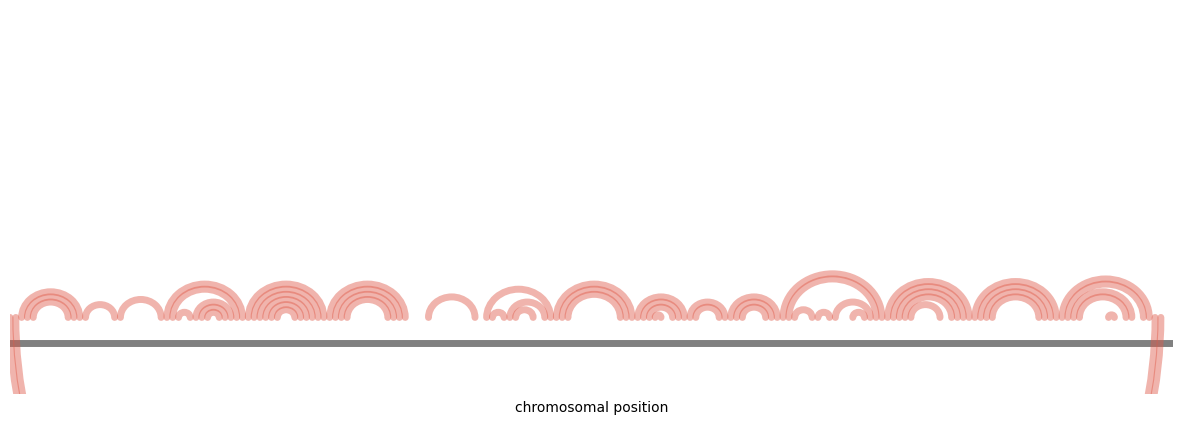

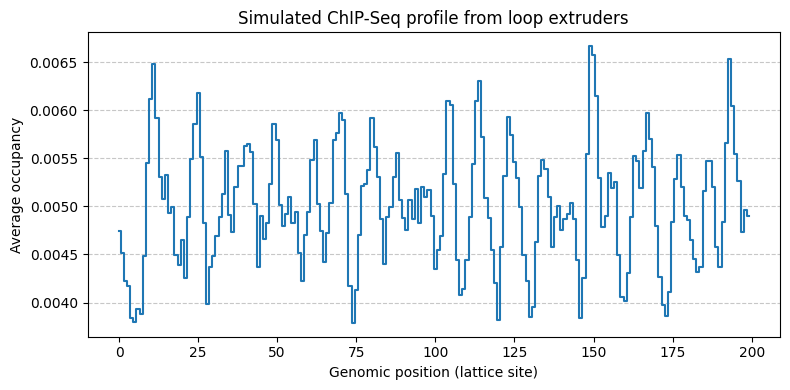

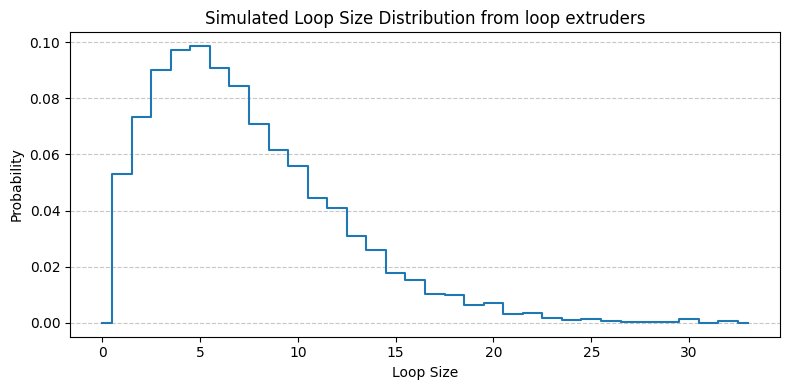

In [1]:
import sys
import numpy as np
import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
from looplib_bacterial import bacterial_no_bypassing, bacterial_bypassing
import os, sys, glob, shelve, time
import matplotlib.pyplot as plt
%matplotlib inline

p = {}
p['L'] = 200                  # 20000
p['N'] = 60
p['R_OFF']  = 1.0 / 1000.0       # 1.0 / 1000.0
p['R_ON']   = 100
p['R_EXTEND'] = float(0.05)      # 2.0
p['R_SHRINK'] = float(0.001)      # 0.1
p['R_BYPASS'] = float(0.0005)

p['T_MAX'] = 800       # 100.0
p['BURNIN_TIME'] = 100
p['N_SNAPSHOTS'] = 40000              # 200
p['PROCESS_NAME'] = b'Test1'         # b'proc'

l_sites, r_sites, ts = bacterial_no_bypassing.simulate(p, verbose = True)

# 4 Plots of time 0, 5, -20, -1
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=4)  # Controlls loop hight, hight is min(max_height, (r-l)/2.0*height_factor)
    plt.xlim(0,p['L'])
    plt.xticks([])
    plt.xlabel('chromosomal position')


# ChIP-Seq profile
L = p['L']      # Number of sites
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of times -1 appears in l_sites: {num_minus_ones}")
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

all_sites = np.concatenate((l_valid_sites,r_valid_sites))

# Count occurrences at each site from 0 to L-1
# np.bincount will count frequencies of values efficiently
chip_seq_counts = np.bincount(all_sites, minlength=L)

# Optional: normalize to get occupancy per time point
chip_seq_profile = chip_seq_counts / chip_seq_counts.sum()  # or / (T*N) if you want full density

print(chip_seq_profile[199])
print(np.sum(all_sites == 199)/len(all_sites))
# Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(L), chip_seq_profile, drawstyle='steps-mid')
plt.title("Simulated ChIP-Seq profile from loop extruders")
plt.xlabel("Genomic position (lattice site)")
plt.ylabel("Average occupancy")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Loop size distribution
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

# Calculate loop sizes with PBC (if l_leg > r_leg, it because it went around the origin)
loop_sizes = (r_valid_sites - l_valid_sites)%p['L']
# Fixing by hand
loop_sizes = loop_sizes[loop_sizes <= 190]  # Remove negative loop sizes
# Max loop sizs sets the number of bins
max_loop_size = np.max(loop_sizes[loop_sizes >= 0])+1
loop_dist  = np.bincount(loop_sizes[loop_sizes >= 0], minlength=max_loop_size)
loop_dist_normalized = loop_dist / loop_dist.sum()  # Normalize to get probability distribution


plt.figure(figsize=(8, 4))
plt.plot(np.arange(max_loop_size), loop_dist_normalized, drawstyle='steps-mid')
plt.title("Simulated Loop Size Distribution from loop extruders")
plt.xlabel("Loop Size")
plt.ylabel("Probability")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
coords = []
for (i,j),val in np.ndenumerate(l_sites):
    if (val >= 0) and (r_sites[i,j] >= 0) and (val > r_sites[i,j]):
        print(f"Loop {j} has crossed the ori TO THE OTTER SIDE!: l={val}, r={r_sites[i,j]}; Coordinates: ({i},{j})")
        coords.append((i,j))

Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (152,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (153,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (154,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (155,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (156,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (157,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (158,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (159,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (160,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (161,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (162,0)
Loop 0 has crossed the ori TO THE OTTER SIDE!: l=199, r=6; Coordinates: (163,0)
Loop 0 has crossed the ori TO THE OTTER 

In [27]:
print(coords[0])


(152, 0)


In [31]:
print(f"Minimum size of r_sites - l_site: {np.min((r_valid_sites - l_valid_sites))}")
print(f"Minimum size of r_sites - l_site with PBC: {np.min(loop_sizes%200)}")
print(f"Maximum size of r_sites - l_site: {np.max((r_valid_sites - l_valid_sites))}")
print(f"Maximum size of r_sites - l_site with PBC: {np.max(loop_sizes%200)}")

Minimum size of r_sites - l_site: -198
Minimum size of r_sites - l_site with PBC: 0
Maximum size of r_sites - l_site: 98
Maximum size of r_sites - l_site with PBC: 199


In [58]:
mask = (r_valid_sites - l_valid_sites) == -1
indices = np.where(mask)[0]
print(f"Indices where r_valid_sites - l_valid_sites == -1: {indices}")

Indices where r_valid_sites - l_valid_sites == -1: [  52   67   82   97  112  127  142  157  172  187  202  217  232  247
  262  277 2426]


In [29]:
for pair in coords:
    print(f"The 'inverted' loop is now of size: {(r_sites[pair[0], pair[1]] - l_sites[pair[0], pair[1]])%200}")

The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverted' loop is now of size: 7
The 'inverte

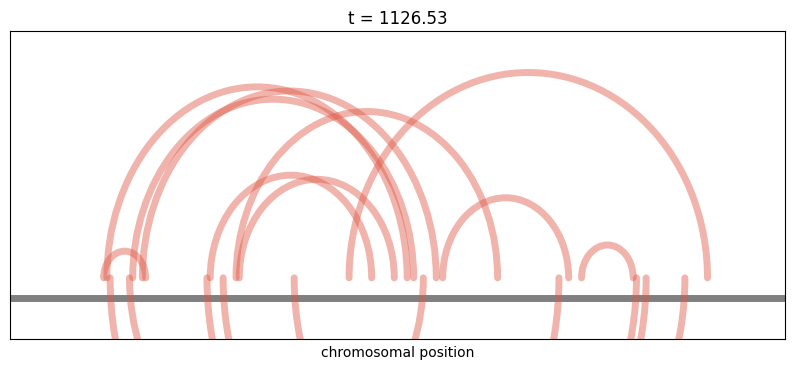

In [23]:
#Create Video
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 4))

def update(frame):
    ax.clear()
    ax.set_xlim(-20, p['L'] + 20)
    ax.set_ylim(-30, 120)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axhline(-10, color='gray', lw=5, zorder=-1)
    ax.set_xlabel('chromosomal position')
    ax.set_title(f"t = {ts[frame]:.2f}")
    loopviz.plot_lefs(
        l_sites=l_sites[frame],
        r_sites=r_sites[frame],
        colors=[(223.0/255.0,90/255.0,73/255.0)] * 500,
        ax=ax,  # Pass ax!
        max_height=200,
        plot_text=False,
        height_factor=4
    )

ani = FuncAnimation(fig, update, frames=len(ts), interval=10)
ani.save("video_trial_bacterial.mp4", writer="ffmpeg", fps=60)
plt.show()

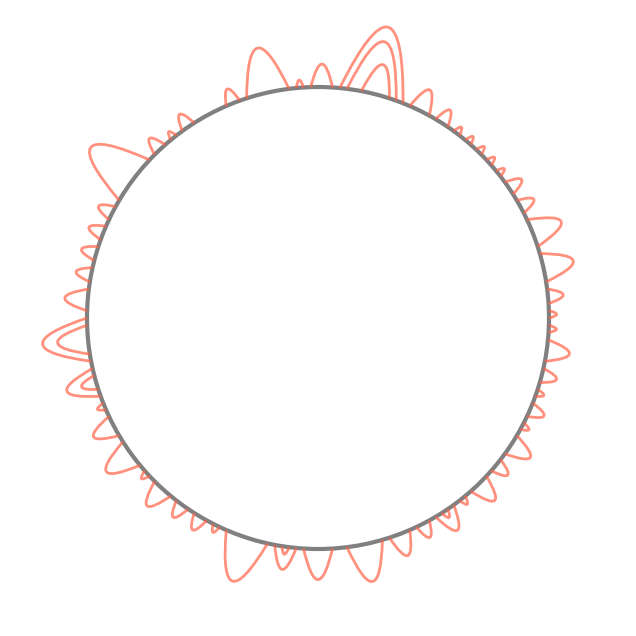

In [73]:
import numpy as np
from looplib import loopviz_circular
# Total genome size (e.g., 1000 base pairs)
genome_size = p['L']

time_step = 100  # Choose the time step you want to visualize, e.g., 0 for the first snapshot
l_vals = l_sites[time_step, :]
r_vals = r_sites[time_step, :]
# Plot the circular genome and the loops
loopviz_circular.plot_circular_genome_with_loops(
    l_sites=l_vals,
    r_sites=r_vals,
    genome_size=genome_size,
    radius=1.5,             # Size of the circle
    height_factor=0.1,    # Controls how far arcs bend out (like arc height)
    max_bend=10,           # Maximum outward bend to avoid ugly shapes
    lw=2,                   # Line width
    alpha=0.7,              # Transparency
    colors='tomato'         # Or a list of colors, one per loop
)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))  # Square figure for circular plot

# Constants
radius = 1.5
height_factor = 0.05  # Tune based on your visual preference
max_bend = 2         # Max bend for arcs
colors = [(223.0/255.0, 90/255.0, 73/255.0)] * 500
genome_size = p['L']   # Length of your genome (e.g., 1000)

def update(frame):
    ax.clear()
    ax.set_xlim(-radius - 0.5, radius + 0.5)
    ax.set_ylim(-radius - 0.5, radius + 0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title(f"t = {ts[frame]:.2f}", fontsize=14)

    # Call your circular plot function here
    loopviz_circular.plot_circular_genome_with_loops(
        l_sites=l_sites[frame],
        r_sites=r_sites[frame],
        genome_size=genome_size,
        radius=radius,
        center=(0, 0),
        colors=colors,
        #bend_outward=None,  # Let it compute from height_factor
        height_factor=height_factor,
        max_bend=max_bend,
        lw=2,
        alpha=0.75,
        ax=ax
    )

# Animate
ani = FuncAnimation(fig, update, frames=len(ts), interval=10)

# Save to video
ani.save("video_circular_loops.mp4", writer="ffmpeg", fps=30)

plt.show()


## Loading-Site probability:

We want to implement a loading-site probability profile. I will use a function similar to what I used for the MaxCal

$ y = A \cdot e^{\min\{ |x-ori|, L - |x-ori| \} ~\cdot~ d}$

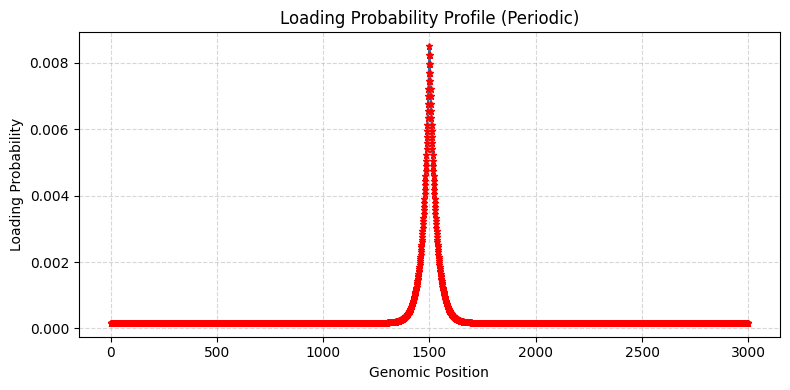

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0       # Peak amplitude
ori = 0.5     # Origin at center
d = -100       # Negative for decay away from ori
L = 3000      # Number of discrete sites

def make_loading_profile(L, ori = 0.5, A = 1.0, d = -50, shift = 0):
    # Generate L evenly spaced values in [0, 1)
    x_vals = np.linspace(0, 1, L, endpoint=False)
    # Periodic distance from ori
    dist_to_ori = np.minimum(np.abs(x_vals - ori), 1 - np.abs(x_vals - ori))
        # Evaluate the function
    prob_profile = A * np.exp(dist_to_ori * d) + shift
    # Normalize so it sums to 1 (for use as probabilities)
    prob_profile /= prob_profile.sum()

    return x_vals, prob_profile

# Generate the loading profile
x_vals, prob_profile = make_loading_profile(L, ori, A, d, shift=0.02)

# Optional: Plot it
plt.figure(figsize=(8, 4))
plt.plot(np.arange(L), prob_profile)
plt.plot(x_vals*L, prob_profile, marker = "*", linestyle='None', color='red', markersize=5)
plt.title("Loading Probability Profile (Periodic)")
plt.xlabel("Genomic Position")
plt.ylabel("Loading Probability")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Now we also add the unloading or unbinding rates using Chat's suggestion:

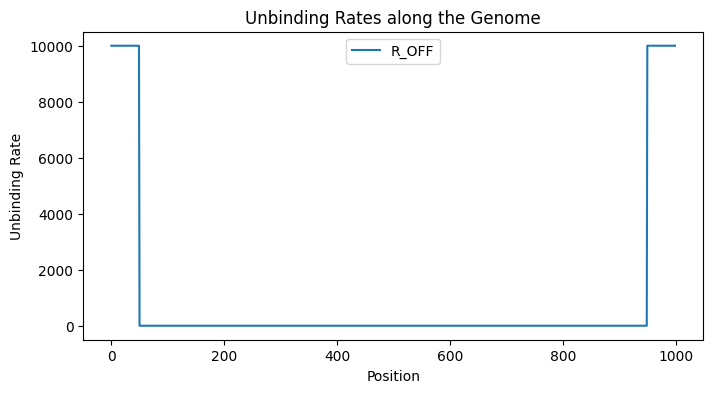

In [2]:
def make_unbinding_rates(L, base_rate=0.01, ter_multiplier=1e6):
    """
    Returns an array of unbinding rates for a genome of length L.
    - Ori is at the center.
    - Ter is 10% of the genome: first 5% and last 5%.
    - Unbinding rate is base_rate everywhere except Ter, where it is base_rate * ter_multiplier.
    """
    rates = np.ones(L) * base_rate
    ter_size = int(0.05 * L)
    # Set Ter region at both ends
    rates[:ter_size] = base_rate * ter_multiplier
    rates[-ter_size:] = base_rate * ter_multiplier
    return rates

# Example usage:
L = 1000
R_OFF = make_unbinding_rates(L, base_rate=0.01, ter_multiplier=1e6)

plt.figure(figsize=(8, 4))
plt.plot(R_OFF, label='R_OFF')
plt.xlabel('Position')
plt.ylabel('Unbinding Rate')
plt.title('Unbinding Rates along the Genome')
plt.legend()

In [ ]:
import sys
import numpy as np
import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
from looplib_bacterial_gal import bacterial_no_bypassing, bacterial_bypassing
import os, sys, glob, shelve, time
import matplotlib.pyplot as plt
%matplotlib inline

# We assume 4600 kb
L                  = 3000
N                  = 60

kp_per_monomer     = 4600//L    # kb / monomer   
leg_move_speed     = 46         # kb / min
step_rate          = float(leg_move_speed/(4600/L)) # monomer/min
contraction_rate_factor   = 30                      # Extend / Shrink factor (we want faster extension)

burnin_time        = L/2/step_rate * 4              # "Thermalization": Janni recommends n x (Time for one leg to cross half genome)
total_time         = 10 * burnin_time               # Take into account that "sampled time" is total_time - burnin_time
print(f"Burning time is: {burnin_time} minutes")


life_time = float(500/30) # In minutes
R_OFF = make_unbinding_rates(L, 
                            base_rate=1./life_time, 
                            ter_multiplier=1e9)
xs, loading_probs = make_loading_profile(L, shift=0.02)

p = {}
p['L'] = L                  # 20000
p['N'] = N
p['R_OFF']  = R_OFF
p['R_ON']   = loading_probs
p['REBINDING_TIME'] = 10

p['R_EXTEND'] = step_rate      # 2.0
p['R_SHRINK'] = step_rate/contraction_rate_factor      # 0.1
p['R_BYPASS'] = float(0.0005)

p['T_MAX'] = 50*burnin_time       # 100.0
p['BURNIN_TIME'] = burnin_time
p['N_SNAPSHOTS'] = 100000              # 200
p['PROCESS_NAME'] = b'Test1'         # b'proc'

l_sites, r_sites, ts, loading_site_probs, lef_lifetimes = bacterial_no_bypassing.simulate(p, verbose = True)

# 4 Plots of time 0, 5, -20, -1
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=4)  # Controlls loop hight, hight is min(max_height, (r-l)/2.0*height_factor)
    plt.xlim(0,p['L'])
    plt.xticks([])
    plt.xlabel('chromosomal position')


# ChIP-Seq profile
L = p['L']      # Number of sites
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of times -1 appears in l_sites: {num_minus_ones}")
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

all_sites = np.concatenate((l_valid_sites,r_valid_sites))

# Count occurrences at each site from 0 to L-1
# np.bincount will count frequencies of values efficiently
chip_seq_counts = np.bincount(all_sites, minlength=L)

# Optional: normalize to get occupancy per time point
chip_seq_profile = chip_seq_counts / chip_seq_counts.sum()  # or / (T*N) if you want full density

#######################################################
# SMC ChIP-Seq
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(L), chip_seq_profile, drawstyle='steps-mid')
plt.title("Simulated ChIP-Seq profile from loop extruders")
plt.xlabel("Genomic position (lattice site)")
plt.ylabel("Average occupancy")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#######################################################
# Loop size distribution 
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

# Calculate loop sizes with PBC (if l_leg > r_leg, it because it went around the origin)
loop_sizes = (r_valid_sites - l_valid_sites)%p['L']
# Fixing by hand
loop_sizes = loop_sizes[loop_sizes <= 190]  # Remove negative loop sizes
# Max loop sizs sets the number of bins
max_loop_size = np.max(loop_sizes[loop_sizes >= 0])+1
loop_dist  = np.bincount(loop_sizes[loop_sizes >= 0], minlength=max_loop_size)
loop_dist_normalized = loop_dist / loop_dist.sum()  # Normalize to get probability distribution


plt.figure(figsize=(8, 4))
plt.plot(np.arange(max_loop_size), loop_dist_normalized, drawstyle='steps-mid')
plt.title("Simulated Loop Size Distribution from loop extruders")
plt.xlabel("Loop Size")
plt.ylabel("Probability")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#######################################################
# Loading-site distribution vs input profile
L = len(prob_profile)
loading_site_probs = np.array(loading_site_probs)
loading_site_probs_norm = loading_site_probs / loading_site_probs.sum()

plt.figure(figsize=(10, 4))

# Plot input profile (background, transparent)
plt.plot(np.arange(L), prob_profile, color='gray', alpha=0.7, label='Input loading-site profile', linewidth=3)

# Plot resulting distribution (foreground)
plt.plot(np.arange(L), loading_site_probs_norm, color='blue', drawstyle='steps-mid', label='Simulated loading-site distribution')

plt.title("Loading site distribution vs input profile")
plt.xlabel("Site i")
plt.ylabel("Probability")

xticks = np.linspace(0, L-1, 10, dtype=int)
plt.xticks(xticks)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#######################################################
# LEF Life-times
# Suppose lef_lifetimes is returned as a list or array
# If it's a list, convert to NumPy array for convenience:
lef_lifetimes = np.array(lef_lifetimes, dtype=np.float64)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(
    lef_lifetimes,
    bins=50,              # Number of bins (tweak for resolution)
    density=True,         # Normalize to make it a probability distribution
    alpha=0.7,
    color="tomato",
    edgecolor="black"
)

plt.title("Distribution of LEF lifetimes")
plt.xlabel("Lifetime")
plt.ylabel("Probability density")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Burning time is: 200.00000000000003 minutes
b'Test1' burn-in period
b'Test1' burn in complete, starting the simulation
b'Test1' 10 1.030636268335769 10000.000000000002
b'Test1' 20 2.0548880123957645 10000.000000000002
b'Test1' 30 3.072611544380436 10000.000000000002
b'Test1' 40 4.0898344775617375 10000.000000000002
b'Test1' 50 5.104878393131941 10000.000000000002
b'Test1' 60 6.12999802208779 10000.000000000002
b'Test1' 70 7.153326529953091 10000.000000000002
b'Test1' 80 8.175614557441008 10000.000000000002
b'Test1' 90 9.201214693934304 10000.000000000002
b'Test1' 100 10.223225040541337 10000.000000000002
b'Test1' 110 11.247494830736457 10000.000000000002
b'Test1' 120 12.271546063856306 10000.000000000002
b'Test1' 130 13.307380220848302 10000.000000000002
b'Test1' 140 14.361225766158839 10000.000000000002
b'Test1' 150 15.389501659268035 10000.000000000002
b'Test1' 160 16.407711711403778 10000.000000000002
b'Test1' 170 17.433403007166703 10000.000000000002
b'Test1' 180 18.448507571196274

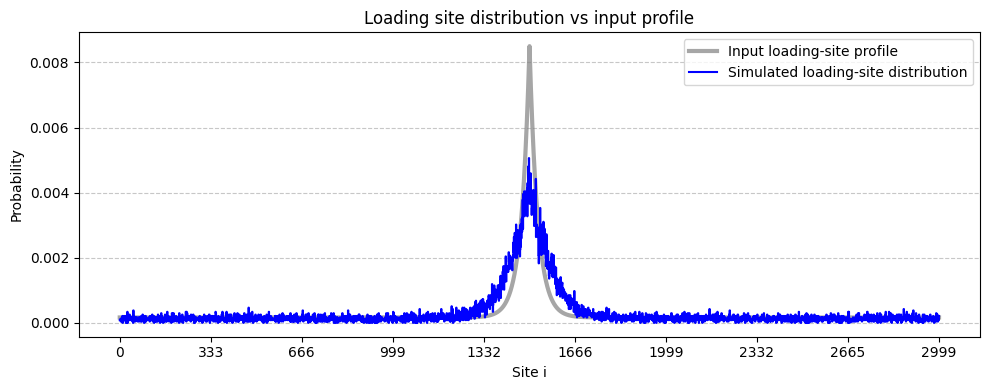

In [8]:
# Assume prob_profile is your input loading-site profile (length L)
# Assume loading_site_probs is the output from simulate (length L)

L = len(prob_profile)
loading_site_probs = np.array(loading_site_probs)
loading_site_probs_norm = loading_site_probs / loading_site_probs.sum()

plt.figure(figsize=(10, 4))

# Plot input profile (background, transparent)
plt.plot(np.arange(L), prob_profile, color='gray', alpha=0.7, label='Input loading-site profile', linewidth=3)

# Plot resulting distribution (foreground)
plt.plot(np.arange(L), loading_site_probs_norm, color='blue', drawstyle='steps-mid', label='Simulated loading-site distribution')

plt.title("Loading site distribution vs input profile")
plt.xlabel("Site i")
plt.ylabel("Probability")

xticks = np.linspace(0, L-1, 10, dtype=int)
plt.xticks(xticks)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

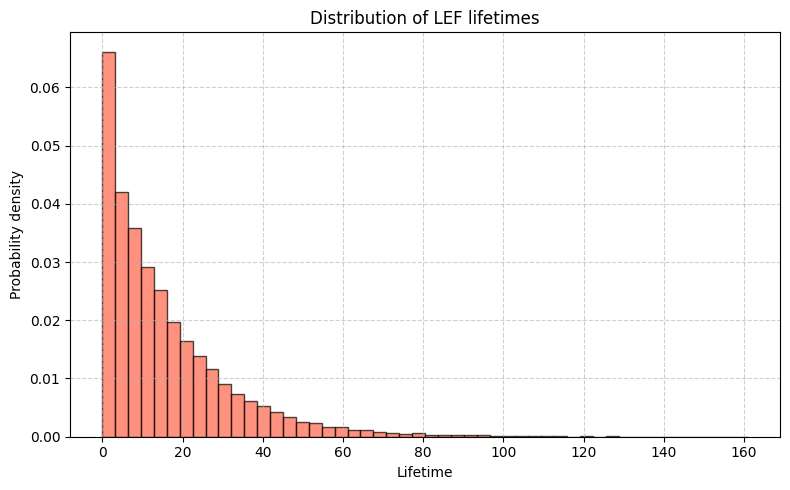

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose lef_lifetimes is returned as a list or array
# If it's a list, convert to NumPy array for convenience:
lef_lifetimes = np.array(lef_lifetimes, dtype=np.float64)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(
    lef_lifetimes,
    bins=50,              # Number of bins (tweak for resolution)
    density=True,         # Normalize to make it a probability distribution
    alpha=0.7,
    color="tomato",
    edgecolor="black"
)

plt.title("Distribution of LEF lifetimes")
plt.xlabel("Lifetime")
plt.ylabel("Probability density")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

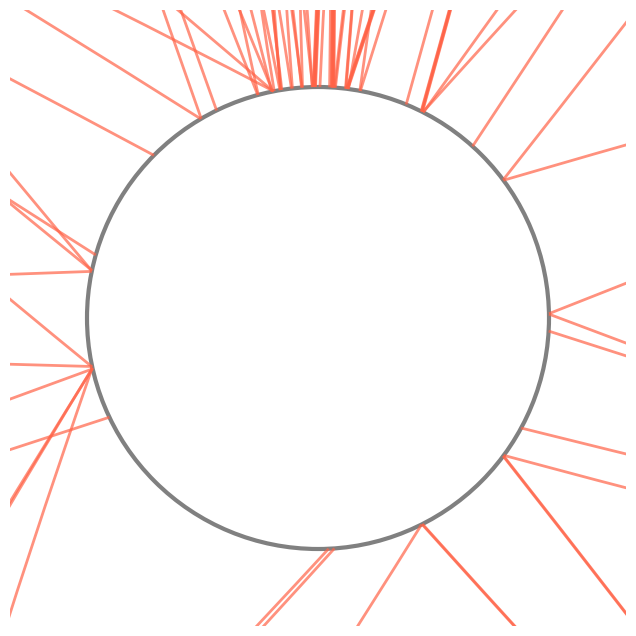

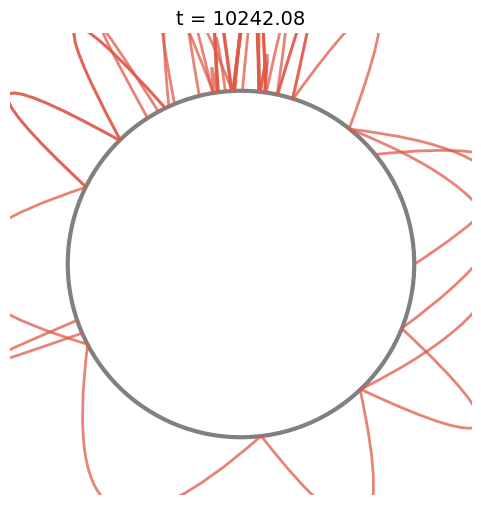

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from looplib import loopviz_circular
# Total genome size (e.g., 1000 base pairs)
genome_size = p['L']

time_step = 100  # Choose the time step you want to visualize, e.g., 0 for the first snapshot
l_vals = l_sites[time_step, :]
r_vals = r_sites[time_step, :]
# Plot the circular genome and the loops
loopviz_circular.plot_circular_genome_with_loops(
    l_sites=l_vals,
    r_sites=r_vals,
    genome_size=genome_size,
    radius=1.5,             # Size of the circle
    height_factor=0.1,    # Controls how far arcs bend out (like arc height)
    max_bend=10,           # Maximum outward bend to avoid ugly shapes
    lw=2,                   # Line width
    alpha=0.7,              # Transparency
    colors='tomato'         # Or a list of colors, one per loop
)

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))  # Square figure for circular plot

# Constants
radius = 1.5
height_factor = 0.05  # Tune based on your visual preference
max_bend = 2         # Max bend for arcs
colors = [(223.0/255.0, 90/255.0, 73/255.0)] * 500
genome_size = p['L']   # Length of your genome (e.g., 1000)

def update(frame):
    ax.clear()
    ax.set_xlim(-radius - 0.5, radius + 0.5)
    ax.set_ylim(-radius - 0.5, radius + 0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title(f"t = {ts[frame]:.2f}", fontsize=14)

    # Call your circular plot function here
    loopviz_circular.plot_circular_genome_with_loops(
        l_sites=l_sites[frame],
        r_sites=r_sites[frame],
        genome_size=genome_size,
        radius=radius,
        center=(0, 0),
        colors=colors,
        #bend_outward=None,  # Let it compute from height_factor
        height_factor=height_factor,
        max_bend=max_bend,
        lw=2,
        alpha=0.75,
        ax=ax
    )

# Animate
frame_step = 50
frames_to_plot = range(0, len(ts), frame_step)
ani = FuncAnimation(fig, update, frames=frames_to_plot, interval=4)

# Save to video
ani.save("N120_L2000_1.mp4", writer="ffmpeg", fps=30)

plt.show()
